In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [6]:
!pip install yfinance --upgrade

Requirement already up-to-date: yfinance in /Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages (0.1.45)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("AMZN", start="2018-01-01").reset_index()
df_full.to_csv('AMZN.csv',index=False)
df_full.head()


[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
1,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
2,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
3,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
4,2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500


In [9]:
close_px = df_full['Adj Close']
mavg = close_px.rolling(window=100).mean()

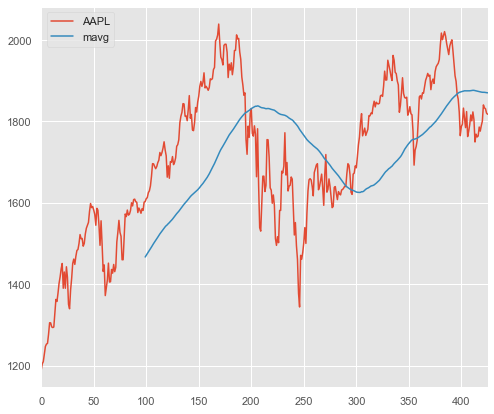

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [11]:
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full.set_index('Date', inplace=True)
df = df_full[['Adj Close']]
df.head()

,Adj Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [12]:
forecast_out = 14
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)
df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,NaN
2019-09-06,1833.51,NaN
2019-09-09,1831.35,NaN
2019-09-10,1820.55,NaN
2019-09-11,1817.82,NaN


In [13]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
X.shape

(412, 1)

In [14]:
df.tail()

,Adj Close,Prediction
Date,,
2019-09-05,1840.72,NaN
2019-09-06,1833.51,NaN
2019-09-09,1831.35,NaN
2019-09-10,1820.55,NaN
2019-09-11,1817.82,NaN


In [15]:
dates = np.array([ str(item).split('T')[0].split(' ')[0] for item in df.index ])
dates = dates[:-forecast_out]

In [16]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [17]:
len(X), len(y), len(dates)

(412, 412, 412)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
x_train.shape

(329, 1)

In [21]:
len(x_train), len(y_train)

(329, 329)

In [22]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
lr_score = lr.score(x_test, y_test)

In [24]:
y_test

array([1800.62, 1786.4 , 1460.83, 1870.32, 1896.2 , 1823.28, 1900.82,
       1772.36, 1819.26, 1581.76, 1495.46, 1390.  , 1572.08, 1530.42,
       1768.7 , 1814.19, 1343.96, 1447.34, 1641.03, 1911.52, 1696.17,
       1390.  , 1797.17, 1660.51, 1683.78, 1441.5 , 1730.22, 1962.46,
       1673.57, 1503.83, 1889.65, 1820.55, 1581.86, 1964.52, 1386.23,
       1544.92, 1855.32, 1904.28, 1551.48, 1822.68, 1816.32, 1517.86,
       1460.17, 1878.27, 1665.53, 1571.68, 1941.05, 1619.44, 1622.1 ,
       1569.68, 1974.85, 1516.73, 1527.49, 1869.67, 1823.54, 1743.07,
       1776.29, 1911.3 , 1582.26, 1450.89, 2002.38, 1451.75, 1787.83,
       1738.5 , 1723.86, 1958.31, 1764.77, 1625.95, 1640.26, 1609.08,
       1755.  , 1710.63, 1642.81, 1624.89, 1704.86, 1777.44, 1502.06,
       1350.5 , 1620.8 , 1729.56, 1952.07, 1631.56, 1572.62])

In [25]:
x_test[0]

array([1762.96])

In [26]:
preds = lr.predict([x_test[0]])

In [27]:
lr_score

0.5998986217974996

In [28]:
preds.reshape(-1, 1)

array([[1768.63232942]])

In [29]:
df.tail()

,Adj Close,Prediction
Date,,
2019-09-05,1840.72,NaN
2019-09-06,1833.51,NaN
2019-09-09,1831.35,NaN
2019-09-10,1820.55,NaN
2019-09-11,1817.82,NaN


In [30]:
df['Prediction'] = df.apply(lambda row: lr.predict([[row.loc['Adj Close']]])[0] if  np.isnan((row.loc['Prediction'])) else row['Prediction'], axis=1)
df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,1825.449715
2019-09-06,1833.51,1820.181539
2019-09-09,1831.35,1818.603279
2019-09-10,1820.55,1810.711975
2019-09-11,1817.82,1808.717229


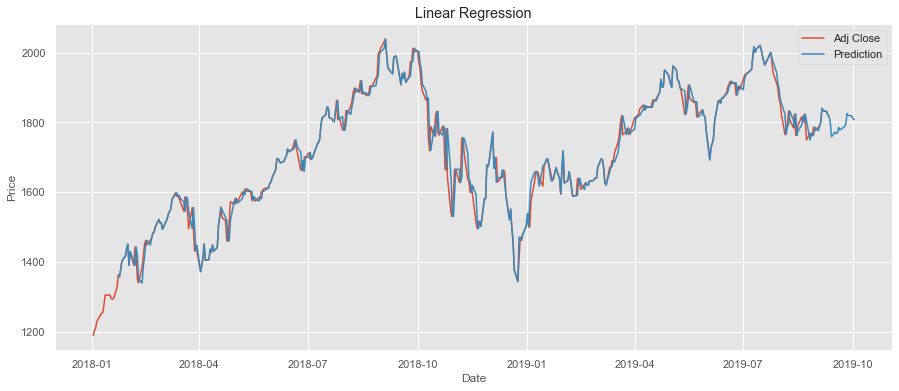

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,6)
plt.plot(df.index.date, df['Adj Close'].values, label= 'Adj Close')
plt.plot(df.index.shift(21, freq='d').date, df['Prediction'].values, label= 'Prediction')
plt.title('Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Ridge Regression

In [32]:
from sklearn.linear_model import Ridge

In [37]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("AMZN", start="2018-01-01").reset_index()
df_full.to_csv('AMZN.csv',index=False)
df_full.head()


[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
1,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
2,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
3,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
4,2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500


In [38]:
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full.set_index('Date', inplace=True)
rr_df = df_full[['Adj Close']]
rr_df.head()

,Adj Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [39]:
forecast_out = 14
rr_df['Prediction'] = rr_df[['Adj Close']].shift(-forecast_out)
rr_df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,NaN
2019-09-06,1833.51,NaN
2019-09-09,1831.35,NaN
2019-09-10,1820.55,NaN
2019-09-11,1817.99,NaN


In [40]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
X.shape

(412, 1)

In [41]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
rr = Ridge(alpha=100)

In [44]:
rr.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
rr_score = rr.score(x_test, y_test)
rr_score

0.6327805671283362

In [46]:
rr_df['Prediction'] = rr_df.apply(lambda row: lr.predict([[row.loc['Adj Close']]])[0] if  np.isnan((row.loc['Prediction'])) else row['Prediction'], axis=1)
rr_df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,1825.449715
2019-09-06,1833.51,1820.181539
2019-09-09,1831.35,1818.603279
2019-09-10,1820.55,1810.711975
2019-09-11,1817.99,1808.841444


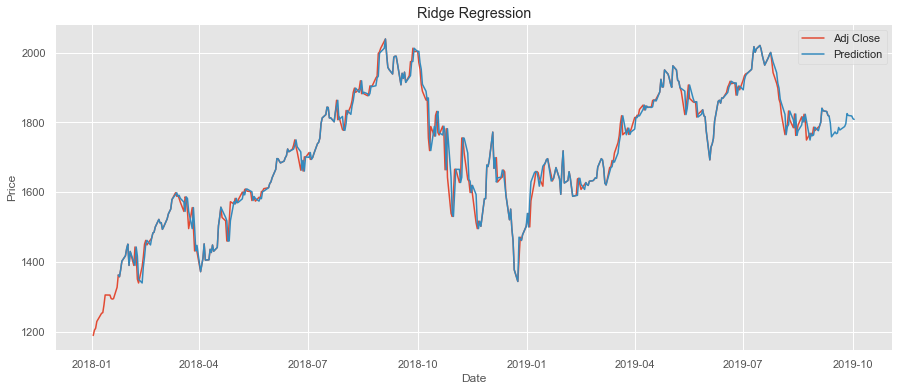

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,6)
plt.plot(rr_df.index.date, rr_df['Adj Close'].values, label= 'Adj Close')
plt.plot(rr_df.index.shift(21, freq='d').date, rr_df['Prediction'].values, label= 'Prediction')
plt.title('Ridge Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [48]:
from sklearn.linear_model import Lasso

In [49]:
lasso = Lasso()

In [50]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("AMZN", start="2018-01-01").reset_index()
df_full.to_csv('AMZN.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1172.00,1190.00,1170.51,1189.01,1189.01,2694500
1,2018-01-03,1188.30,1205.49,1188.30,1204.20,1204.20,3108800
2,2018-01-04,1205.00,1215.87,1204.66,1209.59,1209.59,3022100
3,2018-01-05,1217.51,1229.14,1210.00,1229.14,1229.14,3544700
4,2018-01-08,1236.00,1253.08,1232.03,1246.87,1246.87,4279500


In [51]:
df_full['Date'] = pd.to_datetime(df_full['Date'])
df_full.set_index('Date', inplace=True)
las_df = df_full[['Adj Close']]
las_df.head()

,Adj Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [52]:
forecast_out = 14
las_df['Prediction'] = las_df[['Adj Close']].shift(-forecast_out)
las_df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,NaN
2019-09-06,1833.51,NaN
2019-09-09,1831.35,NaN
2019-09-10,1820.55,NaN
2019-09-11,1817.99,NaN


In [53]:
X = np.array(df.drop(['Prediction'],1))
X = X[:-forecast_out]
X.shape

(412, 1)

In [54]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
lasr_score = lasso.score(x_test, y_test)
lasr_score

0.6937456568282634

In [58]:
las_df['Prediction'] = las_df.apply(lambda row: lr.predict([[row.loc['Adj Close']]])[0] if  np.isnan((row.loc['Prediction'])) else row['Prediction'], axis=1)
las_df.tail()

/Applications/anaconda/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Adj Close,Prediction
Date,,
2019-09-05,1840.72,1825.449715
2019-09-06,1833.51,1820.181539
2019-09-09,1831.35,1818.603279
2019-09-10,1820.55,1810.711975
2019-09-11,1817.99,1808.841444


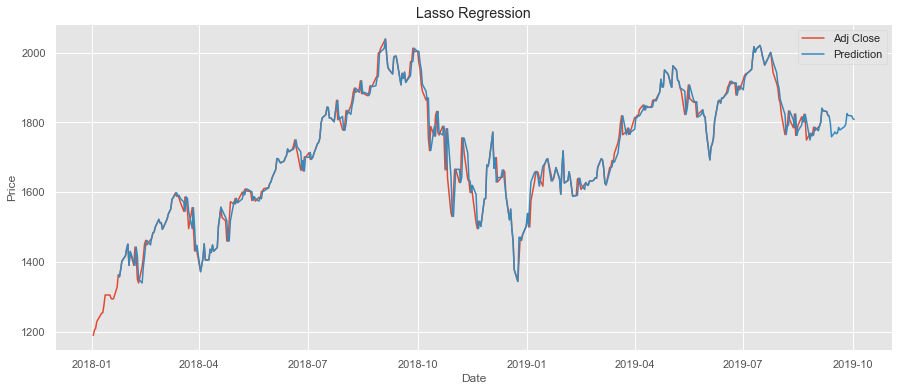

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,6)
plt.plot(las_df.index.date, las_df['Adj Close'].values, label= 'Adj Close')
plt.plot(las_df.index.shift(21, freq='d').date, las_df['Prediction'].values, label= 'Prediction')
plt.title('Lasso Regression')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
